In [2]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras import models, layers, optimizers, losses, metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [6]:
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    layers.LSTM(units=64),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 87s 268ms/step - loss: 0.4139 - accuracy: 0.8044 - val_loss: 0.3429 - val_accuracy: 0.8520
Epoch 2/3
313/313 [==============================] - 78s 250ms/step - loss: 0.2337 - accuracy: 0.9115 - val_loss: 0.3194 - val_accuracy: 0.8740
Epoch 3/3
313/313 [==============================] - 93s 296ms/step - loss: 0.1629 - accuracy: 0.9406 - val_loss: 0.3667 - val_accuracy: 0.8708


In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 29s 38ms/step - loss: 0.3785 - accuracy: 0.8592
Test Loss: 0.3785324990749359
Test Accuracy: 0.8591600060462952


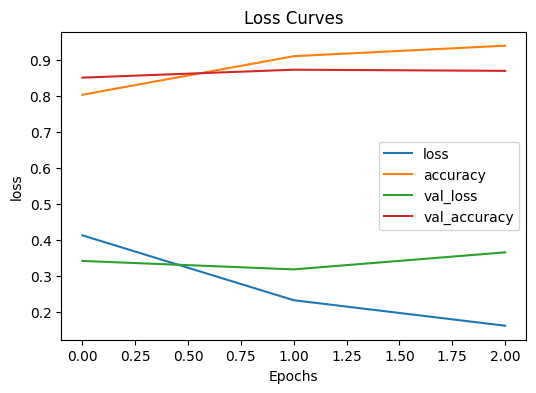

In [10]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel='Epochs', ylabel="loss", title="Loss Curves")
plt.show()

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

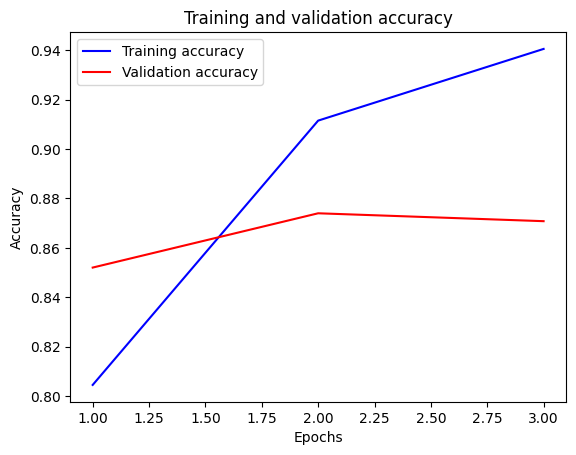

In [18]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
epoch = range(1, len(history.history['loss'])+1)

plt.plot(epoch, acc_values, 'b', label='Training accuracy')
plt.plot(epoch, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
result = model.predict(x_test)

782/782 [==============================] - 31s 38ms/step


In [20]:
result

array([[0.18653016],
       [0.9853499 ],
       [0.45466065],
       ...,
       [0.0775539 ],
       [0.12382145],
       [0.7374678 ]], dtype=float32)

In [21]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
  y_pred[i]=np.round(score)

<ipython-input-21-003b6f253a33>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i]=np.round(score)


In [24]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae

<tf.Tensor: shape=(), dtype=int64, numpy=0>